## Logistic Regression

### Loading the Data

In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
print(iris.shape)

(150, 6)


In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
x = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

### Test Train Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, \
                                                   y, \
                                                   test_size = 0.25, \
                                                   random_state = 0)

### Training

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Prediction

In [9]:
y_pred = classifier.predict(X_test)

### Measuring Performance

#### Accuracy

In [10]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.868421052631579

#### Confusion Metric

In [11]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[13,  0,  0],
       [ 0, 11,  5],
       [ 0,  0,  9]], dtype=int64)

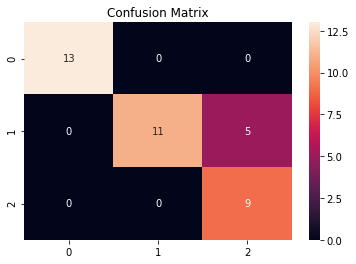

In [14]:
#ploting heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

#### Precision, Recall & F1 Score

In [22]:
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.69      0.81        16
 Iris-virginica       0.64      1.00      0.78         9

    avg / total       0.92      0.87      0.87        38



#### ROC AUC

In [16]:
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(roc_auc)

#### Log Loss

In [19]:
metrics.log_loss(y_test, y_pred)